In [1]:
from dotenv import load_dotenv
load_dotenv()
import os

In [2]:
import json
with open('data_index.json', 'r') as f:
    data_index = json.load(f)
data_index

{'1017': '1017_sci-news.com.html',
 '1028': '1028_redorbit.com.html',
 '1034': '1034_aol.com.html',
 '1050': '1050_honda.com.html',
 '105': '105_amazon.com.html',
 '1070': '1070_wnep.com.html',
 '1083': '1083_highgearmedia.com.html',
 '1089': '1089_freep.com.html',
 '1099': '1099_enthusiastnetwork.com.html',
 '1106': '1106_allstate.com.html',
 '1164': '1164_acbj.com.html',
 '1205': '1205_opensecrets.org.html',
 '1206': '1206_dcccd.edu.html',
 '1221': '1221_gwdocs.com.html',
 '1224': '1224_austincc.edu.html',
 '1252': '1252_cincymuseum.org.html',
 '1259': '1259_fool.com.html',
 '1261': '1261_zacks.com.html',
 '1264': '1264_citizen.org.html',
 '1300': '1300_bankofamerica.com.html',
 '1306': '1306_chasepaymentech.com.html',
 '133': '133_fortune.com.html',
 '135': '135_instagram.com.html',
 '1360': '1360_thehill.com.html',
 '1361': '1361_yahoo.com.html',
 '1419': '1419_miaminewtimes.com.html',
 '144': '144_style.com.html',
 '1468': '1468_rockstargames.com.html',
 '1470': '1470_steampowered

In [3]:
from langchain.document_loaders import TextLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS

from langchain.llms import OpenAI
embeddings = OpenAIEmbeddings()
llm = OpenAI(temperature=0)


def make_data_path(index_number):
    return os.path.join(
        'data/OPP-115/sanitized_policies/', 
        data_index[str(index_number)],
    )

def make_db_path(input_file):
    return os.path.join('db', f'{input_file}.faiss')
    

def make_faiss_db(input_file):
    raw_documents = TextLoader(input_file).load()
    text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0, separator='<br>')
    documents = text_splitter.split_documents(raw_documents)

    db = FAISS.from_documents(documents, embeddings)
    db.save_local(make_db_path(input_file))
    return db

# make_faiss_db('sample_terms/baseline.txt')
# make_faiss_db('sample_terms/malicious.txt')

In [5]:
input_file = 'sample_terms/baseline.txt'
db1 = FAISS.load_local(os.path.join('db', f'{input_file}.faiss'), embeddings)
input_file = 'sample_terms/malicious.txt'
db2 = FAISS.load_local(os.path.join('db', f'{input_file}.faiss'), embeddings)

In [4]:
def query_data_collected(doc_db):
    query = "What personal data is collected?"
    docs = doc_db.similarity_search(query)
    search_result = '\n'.join(d.page_content for d in docs)

    return llm.predict(f'''
   Here are fragments of a privacy policy.

    For each of the item below, check if it is collected according to the framents:           
    - email address 
    - first and last name 
    - phone number 
    - postal address 
    - zip code 
    - IP address 
    - browser used 
    - device identifier 
    - social media info 
    - contacts or connections 
    - phone book 
    - photos or videos 
    - credit card or bank account info 
    - gender 
    - date and time of visit 
    - social security number 
    - drivers license number 
    - location info 

    Each of the above should be assigned a boolean value.

    Return a YAML

    In addition, add an extra field:
    other: a string under 15 words describing what is collected other than the above
                
    fragments of a privacy policy: {search_result}
    list of personal data items:

    ''')

# query_data_collected(db1), query_data_collected(db2), 

In [5]:
def query_retention_policy(doc_db):
    query = '''
    what is the retention policy?
    '''

    docs = doc_db.similarity_search(query)
    search_result = '\n'.join(d.page_content for d in docs)

    return llm.predict(f'''
    what is the retention policy?

    For example, 1 month, 3 months, as long as it takes, unspecified

    return a string

    fragments of a privacy policy: {search_result}
    retention policy:

    ''')
# query_retention_policy(db)

In [48]:
 def query_usage_scope(doc_db):
    query = '''
    what is the personal information used for?
    '''

    docs = doc_db.similarity_search(query)
    search_result = '\n'.join(d.page_content for d in docs)

    return llm.predict(f'''
    what is the personal information used for?

    return a comma-separated list of usages, with each usage described with under 10 words

    fragments of a privacy policy: {search_result}
    usage of personal information:

    ''')
 

 def query_data_transfer_policy(doc_db):
    query = '''
    Will the data be transfered to third parties or other jurisdiction?
    If yes, where?
    '''

    docs = doc_db.similarity_search(query)
    search_result = '\n'.join(d.page_content for d in docs)

    return llm.predict(f'''
    Will the data be transfered to third parties or other jurisdiction?

    return a string under 10 words

    fragments of a privacy policy: {search_result}
    data transfer policy:

    ''')

In [9]:
query_usage_scope(db)

NameError: name 'db' is not defined

In [106]:
query_data_transfer_policy(db)

' Data may be transferred to other parties in certain business transactions, in response to legal process, or when necessary to protect our Services. International users should be aware that data may be transferred to and stored in the U.S.'

In [50]:
subset_data = data_index.keys()

In [13]:
for i in subset_data:
    p = make_data_path(i)
    make_faiss_db(p)

Created a chunk of size 1066, which is longer than the specified 1000
Created a chunk of size 1010, which is longer than the specified 1000
Created a chunk of size 1249, which is longer than the specified 1000
Created a chunk of size 1267, which is longer than the specified 1000
Created a chunk of size 1419, which is longer than the specified 1000
Created a chunk of size 1363, which is longer than the specified 1000
Created a chunk of size 1310, which is longer than the specified 1000
Created a chunk of size 1309, which is longer than the specified 1000
Created a chunk of size 1053, which is longer than the specified 1000
Created a chunk of size 1308, which is longer than the specified 1000
Created a chunk of size 1106, which is longer than the specified 1000
Created a chunk of size 1303, which is longer than the specified 1000
Created a chunk of size 1105, which is longer than the specified 1000
Created a chunk of size 2107, which is longer than the specified 1000
Created a chunk of s

In [51]:
usages = {}
for i in subset_data:
    p = make_data_path(i)
    db = FAISS.load_local(make_db_path(p), embeddings)
    r = query_usage_scope(db)
    print(i)
    usages[i] = r

1017
1028
1034
1050
105
1070
1083
1089
1099
1106
1164
1205
1206
1221
1224
1252
1259
1261
1264
1300
1306
133
135
1360
1361
1419
144
1468
1470
1498
1510
1539
1545
1582
1610
1618
1636
1637
164
1666
1673
1683
1694
1703
1708
1713
175
186
200
202
207
20
21
228
26
303
320
325
32
331
33
348
359
394
414
453
456
481
503
517
523
531
541
559
571
581
584
586
58
591
59
627
635
640
641
642
652
676
686
701
70
723
744
745
746
760
777
807
817
82
856
862
883
884
891
898
907
919
928
93
940
962
988
98
995


In [53]:
usages_csv = usages

In [7]:
import joblib
usages = joblib.load('usages.joblib')

In [54]:
import joblib
joblib.dump(usages_csv, 'usages_csv.joblib')
usages_csv

{'1017': ' collecting data, tracking online traffic, responding to inquiries, verifying age, setting cookies, refusing cookies.',
 '1028': ' Billing, Fulfill orders, Contact user, Supplement information, Profile creation, Tailor visits, Direct marketing, Store information.',
 '1034': " provide Services, show content popularity, give glimpse of friends' activity, develop engaging content, provide effective advertising, analyze information, provide relevant advertising, respond to legal process, protect Services.",
 '1050': ' improve services, promote products, fulfill requests, pre-approved credit investigation, credit decision-making.',
 '105': ' customize experience, fulfill orders, deliver packages, send mail/email, remove repetitive info, analyze data, provide marketing, process payments, provide customer service, send promotional offers, protect Amazon/others, consent-based sharing.',
 '1070': ' personalize services, process payments, verify identity, provide customer support, anal

In [56]:
from tqdm import tqdm
usages_csv_embedding = {}
for k, v in tqdm(usages_csv.items()):
    usages_csv_embedding[k] = embeddings.embed_documents(v.split(','))

100%|██████████| 115/115 [00:24<00:00,  4.70it/s]


In [60]:
from itertools import chain
all_usage_chained = list(chain.from_iterable(usages_csv_embedding.values()))

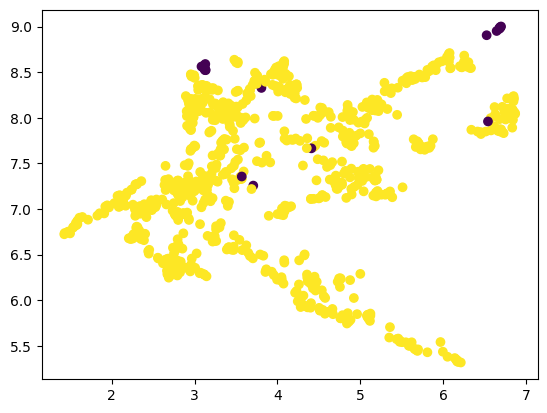

In [125]:
from umap import UMAP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import FunctionTransformer
pipe = Pipeline([('umap', UMAP()), ('kmeans', KMeans())])
umap = UMAP(n_components=100, n_neighbors=10)
clusterer = KMeans(n_clusters=3)
clusterer = LocalOutlierFactor(n_neighbors=20)
t_umap = umap.fit_transform(np.array(all_usage_chained))
t_cluster = clusterer.fit_predict(t_umap).reshape(-1, 1)
plt.scatter(t_umap[:,0], t_umap[:,1], c=t_cluster)


In [103]:
usages

{'1017': ' collecting data, tracking online traffic, responding to inquiries, verifying age, setting cookies, refusing cookies.',
 '1028': ' Billing, Fulfill orders, Contact user, Supplement information, Profile creation, Tailor visits, Direct marketing, Store information.',
 '1034': " provide Services, show content popularity, give glimpse of friends' activity, develop engaging content, provide effective advertising, analyze information, provide relevant advertising, respond to legal process, protect Services.",
 '1050': ' improve services, promote products, fulfill requests, pre-approved credit investigation, credit decision-making.',
 '105': ' customize experience, fulfill orders, deliver packages, send mail/email, remove repetitive info, analyze data, provide marketing, process payments, provide customer service, send promotional offers, protect Amazon/others, consent-based sharing.',
 '1070': ' personalize services, process payments, verify identity, provide customer support, anal

In [126]:
pd.DataFrame([all_usage_chained, t_cluster])
t_cluster.shape
foo = pd.DataFrame([chain.from_iterable(v.split(',') for v in usages_csv.values()), t_cluster.squeeze()]).T.drop_duplicates().sort_values(1)

In [127]:
foo[1].value_counts()

1
1     850
-1     18
Name: count, dtype: int64

In [8]:
user_embeddings = embeddings.embed_documents(list(usages.values()))

In [9]:
user_embeddings = dict(zip(usages.keys(), user_embeddings))

In [19]:
import pandas as pd
pd.DataFrame(user_embeddings).T.to_clipboard(index=None, columns=None, sep=',')

In [11]:
pipe

Pipeline(steps=[('umap',
                 UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})),
                ('kmeans', KMeans())])

/Users/yawerijaz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


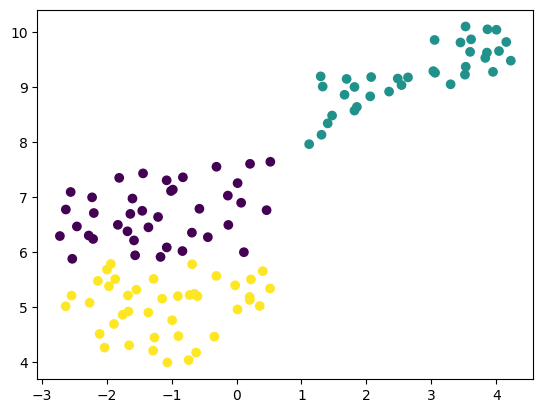

In [28]:
from umap import UMAP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
pipe = Pipeline([('umap', UMAP()), ('kmeans', KMeans())])
umap = UMAP()
kmeans = KMeans(n_clusters=3)
t_umap = umap.fit_transform(np.array(list(user_embeddings.values())))
t_kmeans = kmeans.fit_predict(t_umap)
plt.scatter(t_umap[:,0], t_umap[:,1], c=kmeans.predict(t_umap))


In [47]:
import pandas as pd
pd.DataFrame([usages]).T.assign(cluster=t_kmeans).sort_values('cluster').to_csv('usage_cluster.csv')
# usages
# t_kmeans

array([ 1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,
        1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1])

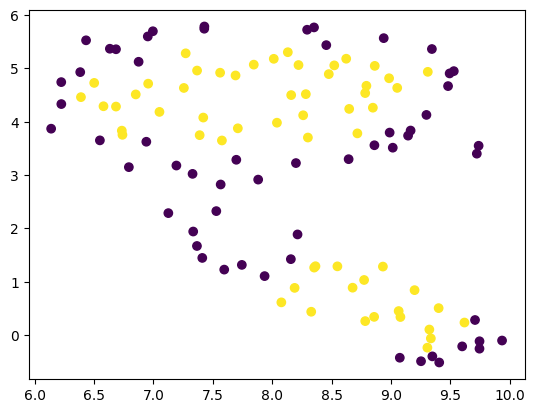

In [37]:
from umap import UMAP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import LocalOutlierFactor
pipe = Pipeline([('umap', UMAP()), ('kmeans', KMeans())])
umap = UMAP()
lof = LocalOutlierFactor(contamination=0.5)
t_umap = umap.fit_transform(np.array(list(user_embeddings.values())))
t_lof = lof.fit_predict(t_umap)
plt.scatter(t_umap[:,0], t_umap[:,1], c=t_lof)
t_lof

In [14]:
import numpy as np
clusterer.fit_predict(np.array(list(user_embeddings.values())))

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [19]:
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
tttt = TSNE()
tttt.fit_transform(np.array(list(user_embeddings.values())))

: 

: 